# Assignment 6

### Instructions

* Write your code in the cells provided.  Where appropirate, enter markdown to answer questions.

* Submit this notebook to owl.

`TODO`:
* Part C & D??
* Part H


---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 500)
from IPython.display import display

%matplotlib inline

### You're a Data Scientist...Which is Just a Statistician on a Mac, Right?

Your models from the last assignment really impressed some of the management in your football club.  In the spirit of Moneyball (it was a book before it was a movie, I recomend you read it), managers want to test some hypotheses relating a player's overall rating and some of their characteristics in order to make better decisions on what players to trade/sign.

Management heard somewhere on the internet that statistics and data science are more or less the same thing (the truth of this is the subject of many debates) and would now like you to create some *statistical models* for inference instead of prediction.

In this assignment, you're going to take off your "data" hat and put on your "science" hat.

### The Dataset

To test some of the management's hypotheses, the football club has spent some money to go out and collect new data in `footballer_sample.csv`.  The variables are more or less the same from the previous dataset.

The data contain 52 columns, including some information about the player, their skills, and their overall measure as an effective footballer.

Most features relate to the player's abilities in football related skills, such as passing, shooting, dribbling, etc.  Some features are rated on a 1-5 scale (5 being the best), others are rated on 0-100 (100 being the best), and others still are categorical (e.g. work rate is coded as low, medium, or high).

The target variable (or $y$ variable, if you will) is `overall`.  This is an overall measure of the footballer's skill and is rated from 0 to 100.  The most amazingly skilled footballer would be rated 100, where as I would struggle to score more than a 20. The model(s) you build should use the other features to predict `overall`.



### Part A

Read in the data and take a look at the dataframe.  There should be 52 columns. The outcome of interest is called `overall` which gives an overall measure of player performance. Not all of the other columns are particularly useful for modelling though (for instance, `ID` is just a unique identifier for the player.  This is essentially an arbitrary number and has no bearing on the player's rating).

Remember that the Senior Data Scientist from the last assignment thinks the following columns should be removed:

* ID
* club
* club_logo
* birth_date
* flag
* nationality
* photo
* potential


That still sounds like a pretty good idea.  Remove those columns.  Keep the categorical variables as they are encoded.  Statsmodels will automatically dummy encode them for us

In [2]:
df = pd.read_csv('sampled_footballers.csv')
model_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')
model_data.head()

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,20,175.0,70.0,58,65,30,38,56,60,53,1,3,3,Medium,High,Right,55,27,53,33,26,63,33,32,27,41,68,62,54,55,75,27,55,62,47,30,54,60,54,40,45,43,53,70
1,29,183.0,80.0,65,83,62,58,64,55,80,1,2,3,High,High,Right,63,59,64,62,55,62,46,59,43,64,81,85,73,68,65,70,75,90,77,59,78,53,60,61,68,65,52,56
2,35,183.0,78.0,67,46,66,63,66,50,71,1,3,3,High,Low,Right,51,67,69,69,61,65,63,65,64,66,34,55,78,66,51,65,72,54,80,63,67,59,70,64,67,65,45,43
3,24,178.0,72.0,69,77,69,48,70,21,39,1,3,3,Medium,Medium,Right,49,70,67,62,66,67,37,43,39,68,71,81,91,70,78,68,28,34,34,70,59,25,73,34,59,54,11,17
4,23,173.0,73.0,70,79,64,64,72,21,55,1,3,3,Medium,Medium,Right,66,66,58,68,64,70,46,48,59,71,76,82,79,68,78,65,34,69,57,59,36,19,67,66,63,63,13,18


### Part B

In statistics, it is useful to *standardize* our data to have mean 0 and standard deviation 1.  This has the effect of putting all the variables on the same scale.  It also has the added benefit of easing the interpretation of the coefficients to the following:

>Every 1 standard deviation change in the predictor $x$ results in a change of $\beta$ in the outcome.

Here, $\beta$ is the coefficient from the linear model we fit to the data. Standardize all the numeric variables.  A good way to check that you've done this correctly is to compute the means (which should be close to 0) and the standard deviations (which should be close to 1).

In [3]:
for i in range (0, len(model_data.columns)):
    col = model_data.columns[i]
    if model_data[col].dtypes != 'object':
        model_data[col] = preprocessing.scale(model_data[col])
        
model_data.describe()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to 

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,3.006484e-16,1.828537e-15,-1.386669e-16,-8.949508e-16,-2.138290e-16,1.287859e-17,1.921800e-16,1.021405e-16,-1.540990e-16,-1.546263e-16,3.235190e-16,-1.381117e-16,-1.012523e-16,-6.949996e-17,1.545430e-16,1.043610e-16,-2.059464e-17,1.056932e-16,3.197442e-17,3.330669e-17,-2.327027e-16,6.739054e-17,1.252332e-16,-7.482903e-17,-6.528111e-17,1.474376e-16,4.152234e-16,-1.620926e-16,1.283418e-16,1.660894e-16,1.891820e-16,5.873080e-17,-1.598721e-17,-2.045031e-16,1.274536e-16,1.383338e-16,2.587375e-16,1.381117e-16,1.982858e-16,1.700862e-16,7.904788e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.731859e+00,-2.635321e+00,-2.531461e+00,-2.829396e+00,-3.364140e+00,-2.248185e+00,-3.104085e+00,-3.157626e+00,-2.002142e+00,-3.309659e+00,-3.234206e-01,-1.760172e+00,-3.194121e+00,-2.307241e+00,-2.001035e+00,-2.690056e+00,-3.012803e+00,-2.148550e+00,-2.532915e+00,-2.074816e+00,-2.013266e+00,-2.643182e+00,-2.953177e+00,-3.280353e+00,-3.246441e+00,-3.257684e+00,-3.237410e+00,-3.082273e+00,-2.424026e+00,-3.084429e+00,-2.948054e+00,-3.238288e+00,-2.162624e+00,-2.391846e+00,-2.079895e+00,-2.285588e+00,-2.871219e+00,-2.581538e+00,-3.134522e+00,-1.884645e+00,-1.945798e+00
25%,-8.717356e-01,-6.428134e-01,-7.476953e-01,-5.710733e-01,-6.408750e-01,-7.172926e-01,-6.591832e-01,-5.598259e-01,-8.330765e-01,-6.362672e-01,-3.234206e-01,-3.871830e-01,1.158490e-01,-7.106487e-01,-8.647291e-01,-4.907314e-01,-4.179078e-01,-7.216626e-01,-4.348284e-01,-6.726927e-01,-6.794921e-01,-6.340942e-01,-3.682604e-01,-5.990117e-01,-5.962297e-01,-5.726661e-01,-6.726390e-01,-6.023972e-01,-6.531628e-01,-5.971200e-01,-4.829249e-01,-5.775978e-01,-8.116983e-01,-6.732337e-01,-9.580395e-01,-6.027415e-01,-7.784939e-01,-6.634149e-01,-5.258986e-01,-1.060456e+00,-9.343731e-01
50%,-1.161167e-02,-2.973434e-02,-4.459415e-03,-6.492677e-03,3.994122e-02,1.873255e-01,1.871290e-01,1.824027e-01,1.021764e-01,5.683432e-02,-3.234206e-01,-3.871830e-01,1.158490e-01,2.252847e-01,6.497606e-02,1.859839e-01,3.605606e-01,2.031888e-02,2.995018e-01,-5.662946e-03,-4.924705e-02,2.084267e-01,2.929973e-01,2.053908e-01,1.512659e-01,1.158000e-01,-3.568377e-03,1.415655e-01,2.608310e-01,1.076176e-01,1.784513e-01,1.065796e-01,1.495370e-01,1.499669e-01,2.377839e-01,2.579508e-01,1.235430e-01,3.989696e-02,1.448904e-01,1.758270e-01,2.839347e-01
75%,8.485122e-01,7.366145e-01,7.387764e-01,6.992331e-01,6.299820e-01,7.440136e-01,6.573025e-01,6.462955e-01,8.036160e-01,7.499358e-01,-3.234206e-01,9.858063e-01,1.158490e-01,7.758337e-01,8.397303e-01,6.935204e-01,6.849225e-01,7.623004e-01,6.797800e-01,7.566567

### Part C

One of the things scouts like to disagree upon is how a player changes as they age.  Some insist that players hit their prime in their late 20s and as they reach middle age, they become worse because they can't keep up with younger players.

Other scouts are certain that the experience a player gains over their tenure makes them more valuable; they can anticipate what will happen on the field much better than a new player.

You decide that a quadratic term for age in a statistical model might be worth investigating. Write down a statistical model for these competing hypotheses.  What is the null hypothesis? What is the alternative hypothesis?



Null hypothesis: Age has no significant effect on the response variable.
Alternative hypothesis: Age has a significant effect on the response variable.

### Part D

Fit your model from Part C.  What can you conclude from the model about the quadratic effect of age within the quadratic model?  Answer in terms of the null hypothesis.

ANSWER: We reject the null hypothesis as there is evidence of a significant negative associate between quadratic age term and overall performance. I will not though, when you compare models using age, age**2 and age**2 + age, you see consistently that age has a positive association with overall and age**2 has a negative association. I suspect that, since the only different isn the growth rate, the effect of age helps your overall score until a certain point then it begins to hurt it. 

In [11]:
M1 = ols('overall ~ I(age**2)', data=model_data).fit()

M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.089
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00270
Time:                        11:16:21   Log-Likelihood:                -704.95
No. Observations:                 500   AIC:                             1414.
Df Residuals:                     498   BIC:                             1422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1156      0.059      1.970      0.049       0.000       0.231
I(age ** 2)    -0.1156      0.038     -3.015      0.003      -0.191      -0.040
==============================================================================
Omnibus:                        1.020   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.964
Skew:                           0.107   Prob(JB):                        0.618
Kurtosis:                       3.006   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Part E

Management would also like to know how marking (the player's ability to prevent the other team from getting the ball) and interceptions (taking the ball when the opposing team is passing the ball between players) impact a player's overall ranking, controlling for age.

Marking and interceptions sound awfully similar, don't they? Fit two models: one model only controls for age (including the quadratic term) and marking, the other controls for age (including the quadratic term), marking, AND interceptions.

Answer the following:

* At the level of model-inference (based on on AIC) which one is the better model for the data? 

* At the level of parameter based inference, does marking have a positive, negative, or no influence on the overall ability? How does this conclusion differ bewteen the first and second model?  

* Why is this difference troubling? How does the interpretation of a one standard deviation change in marking change between models?

* Sentences, what might explain this difference? You might want to look at `model_data.corr()`.

ANSWER: From the results below we can answer the following questions.
* At the level of model-inference (based on on AIC) which one is the better model for the data?

* At the level of parameter based inference, does marking have a positive, negative, or no influence on the overall ability? How does this conclusion differ bewteen the first and second model?
In the first model, Marking appears to have a significant and positive influence on overall ability. But in the second model, when interceptions were included, marking still has a significant effect on the overall ability (although alot less significant) but it's appears to be negative.

* Why is this difference troubling? How does the interpretation of a one standard deviation change in marking change between models?
This difference is troubling because, when looking at the second model, if we knew no better we would conclude that marking is an undesired trait. When looking at the first model we might conclude that marking has a causal relationship with overall.

* Sentences, what might explain this difference? You might want to look at model_data.corr().
This is caused by colliniearity. This is clear to see in the corelation matrix plotted below, marking and interceptions have a corelation of 0.94.


In [5]:
temp = model_data
M1 = ols('overall ~ age + I(age**2) + marking', data=model_data).fit()
M2 = ols('overall ~ age + I(age**2) + marking + interceptions', data=model_data).fit()


# model-inference (based on on AIC) 
print('age + marking vs. age + marking + interceptions: ',M1.aic - M2.aic)

# parameter based inference  
display(M1.summary())
display(M2.summary())

# Correlation table

model_data.loc[:,['age','marking','interceptions','overall']].corr()

age + marking vs. age + marking + interceptions:  11.186029740812046


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     84.46
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.70e-44
Time:                        11:05:23   Log-Likelihood:                -606.30
No. Observations:                 500   AIC:                             1221.
Df Residuals:                     496   BIC:                             1237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2449      0.049      4.990      0.000       0.148       0.341
age             0.5501      0.038     14.299      0.000       0.475       0.626
I(age ** 2)    -0.2449      0.033     -7.473      0.000      -0.309      -0.180
marking         0.1287      0.037      3.473      0.001       0.056       0.202
==============================================================================
Omnibus:                       19.398   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.736
Skew:                           0.461   Prob(JB):                     3.14e-05
Kurtosis:                       3.383   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     68.22
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.70e-46
Time:                        11:05:23   Log-Likelihood:                -599.70
No. Observations:                 500   AIC:                             1209.
Df Residuals:                     495   BIC:                             1230.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2381      0.049      4.907      0.000       0.143       0.333
age               0.5222      0.039     13.469      0.000       0.446       0.598
I(age ** 2)      -0.2381      0.032     -7.342      0.000      -0.302      -0.174
marking          -0.2276      0.105     -2.176      0.030      -0.433      -0.022
interceptions     0.3849      0.106      3.637      0.000       0.177       0.593
==============================================================================
Omnibus:                       17.550   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.641
Skew:                           0.430   Prob(JB):                     8.96e-05
Kurtosis:                       3.392   Cond. No.                         6.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,age,marking,interceptions,overall
age,1.000000,0.165444,0.220115,0.495185
marking,0.165444,1.000000,0.937530,0.215693
interceptions,0.220115,0.937530,1.000000,0.283084
overall,0.495185,0.215693,0.283084,1.000000


### Part F

Fit the linear model `overall~ preferred_foot`.  Incredibly, the model says that **RIGHT FOOTED PLAYERS TEND TO BE WORSE AS COMPARED TO LEFT FOOTED PLAYERS**! Scounts don't believe you, this goes against everything they've believed about being left footed.  

Perform a randomization test on this data.  Perform 1000 randomizations of `preferred_foot`, fit the same model, and record the effects.  Plot a histogram of the effects from the randomized data and use `plt.axvline` to plot a vertical red line to indicate where the observed effect from our data lies.

Print out the p value (that is, the proportion of the resampled effects are larger than our observed effect in absolute value).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.385
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00231
Time:                        11:05:55   Log-Likelihood:                -704.80
No. Observations:                 500   AIC:                             1414.
Df Residuals:                     498   BIC:                             1422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2447      0.091      2.678      0.008       0.065       0.424
preferred_foot[T.Right]    -0.3203      0.105     -3.063      0.002      -0.526      -0.115
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.065
Skew:                           0.038   Prob(JB):                        0.587
Kurtosis:                       3.213   Cond. No.                         3.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our p value is:  0.001


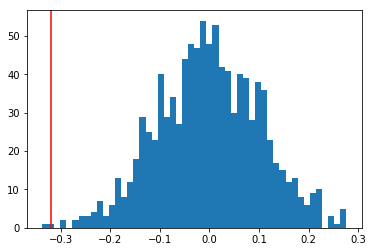

In [7]:
def randomize_column (df,colname):
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    df_copy[colname]=var
    return df_copy

display(ols('overall ~ preferred_foot', data=model_data).fit().summary())

# Get the effect we see from the data
observed_effect = ols('overall ~ preferred_foot', data=model_data).fit().params[1]

# Initialize somewhere to put the resampled effects
randomization_tests = np.zeros(1000)

for i in range(1000):
    # Randomize the overall
    Model_D=randomize_column(model_data,'preferred_foot')
    # Estimate the effect of weight now that we have shuffled overall
    shuffled_model = ols('overall ~ preferred_foot',data =Model_D ).fit()
    # Stick the result in this array
    randomization_tests[i]=shuffled_model.params[1]

# Plots
plt.hist(randomization_tests,bins=50)
plt.axvline(observed_effect, color = 'red')

p_value = np.mean(np.abs(randomization_tests)>np.abs(observed_effect))
print('Our p value is: ', p_value)


### Part G

Your findings from the randomization test are incredible; left footed players are on average 2.5 points better than their right footed counterparts!  The management is prepared to spend a lot of money to replace the team full of lefties in order to gain a slight advantage.

However, you have a sneaking suspicion this isn't the whole story.  Before management replaces the entire team, you decide to take a look at the dataset from your predictive model, called `footballer_data.csv`.  Load that data, clean it up as you did in part A, and perform another regression of overall onto preferred_foot, this time controlling for age (including the quadratic term) and interceptions.  Answer the following in a markdown cell:

* What is the p-value for the effect of being right footed?  
* What does that mean in terms of the null hypothesis?


ANSWER: p-value is 0.243. This gives us reason not to reject the null hypothesis of there being a significant effect from foot_preffered to overall

In [8]:
df_2 = pd.read_csv('footballer_data.csv')
model_data_2 = df_2.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')
model_data.head()
display(ols('overall ~ age + I(age**2) +preferred_foot+ interceptions', data=model_data_2).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2157.
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:06:02   Log-Likelihood:                -56885.
No. Observations:               17994   AIC:                         1.138e+05
Df Residuals:                   17989   BIC:                         1.138e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.6941      1.149      3.216      0.001       1.442       5.946
preferred_foot[T.Right]    -0.1176      0.101     -1.168      0.243      -0.315       0.080
age                         4.0963      0.090     45.382      0.000       3.919       4.273
I(age ** 2)                -0.0666      0.002    -38.724      0.000      -0.070      -0.063
interceptions               0.0692      0.002     32.490      0.000       0.065       0.073
==============================================================================
Omnibus:                      466.844   Durbin-Watson:                   0.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.822
Skew:                           0.364   Prob(JB):                    3.28e-116
Kurtosis:                       3.425   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Part H

The club owner, Owen Owner, saw the results of your randomization test and is convinced that he should replace the whole team with left-footed players. Using your results from Part G, write an email explaining to him why this isn't a worthwhile endeavour. 



Dear Owen Owner,

Thank you for taking the time to look at my statistical analysis. Regarding the club's preference for left-footed players as a result of the randomization test you saw...

Sincerely,

Junior Data Scientist